In [1]:
#Import pandas, matplotlib.pyplot, and seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [2]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# upload credit table data

credit = pd.read_csv("credit_record.csv")

credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
# upload application data

app = pd.read_csv("application_record.csv")

In [5]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
#  Replace C and X with 0, expanding the 0 group to 0-29 days past due

credit['STATUS'] = credit['STATUS'].replace(['X'],0)
credit['STATUS'] = credit['STATUS'].replace(['C'],0)
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0


In [7]:
# Convert status to numeric and group-max by status for each unique id.  
credit['STATUS'] = credit['STATUS'].apply(pd.to_numeric) 

# Select highest status
credit = credit.groupby('ID')['STATUS'].max().reset_index()

# export data to csv file
credit.to_csv('credit.csv',index=False)

credit.groupby('ID')['STATUS'].count().reset_index()

,ID,STATUS
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1
...,...,...
45980,5150482,1
45981,5150483,1
45982,5150484,1
45983,5150485,1


In [8]:
# merge with app table

df = pd.merge(app, credit, left_on='ID', right_on='ID')
df.shape

(36457, 19)

In [9]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0


In [10]:
# changed NaN values

df["OCCUPATION_TYPE"].fillna("Not Listed", inplace=True)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Not Listed,2,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Not Listed,2,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,5
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,5
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,5
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,2


In [11]:
# convert days to years
df['DAYS_BIRTH'] = round(df['DAYS_BIRTH']/-365,0).astype(int)
df['DAYS_EMPLOYED'] = round(df['DAYS_EMPLOYED']/-365,0).astype(int)


df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Not Listed,2,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Not Listed,2,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1,0


<AxesSubplot:>

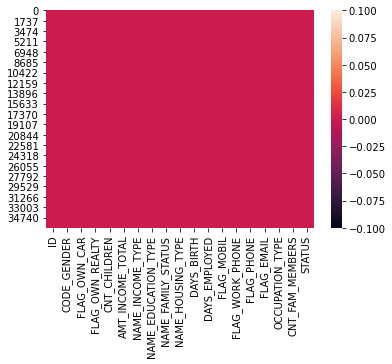

In [12]:
# check for nulls

sns.heatmap(df.isnull())

In [13]:
#  Convert categorical data to binary data
df = pd.get_dummies(df, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                                   'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],               
               prefix=["gender", "own_car", 'own_property', 'income_type', 'education', 'family_status', 'housing_type',
                      'occupation_type'])


In [14]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Not Listed,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,5008804,0,427500.0,33,12,1,1,0,0,2,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,33,12,1,1,0,0,2,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,59,3,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,52,8,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,52,8,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [15]:
list(df.columns)

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'STATUS',
 'gender_F',
 'gender_M',
 'own_car_N',
 'own_car_Y',
 'own_property_N',
 'own_property_Y',
 'income_type_Commercial associate',
 'income_type_Pensioner',
 'income_type_State servant',
 'income_type_Student',
 'income_type_Working',
 'education_Academic degree',
 'education_Higher education',
 'education_Incomplete higher',
 'education_Lower secondary',
 'education_Secondary / secondary special',
 'family_status_Civil marriage',
 'family_status_Married',
 'family_status_Separated',
 'family_status_Single / not married',
 'family_status_Widow',
 'housing_type_Co-op apartment',
 'housing_type_House / apartment',
 'housing_type_Municipal apartment',
 'housing_type_Office apartment',
 'housing_type_Rented apartment',
 'housing_type_With parents',
 'occupation_type_Accountants',
 'occupation_type_Cleaning staff',
 'occu

In [16]:
# remove Flag_Phone

df.drop(columns =['FLAG_PHONE'], inplace=True)

df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Not Listed,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,5008804,0,427500.0,33,12,1,1,0,2,1,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,33,12,1,1,0,2,1,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,59,3,1,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,52,8,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,52,8,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,48,7,1,0,0,2,5,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,157500.0,34,4,1,0,1,2,5,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,157500.0,34,4,1,0,1,2,5,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,283500.0,49,2,1,0,0,2,2,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# remove flag 

df.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE','FLAG_EMAIL'], inplace=True)
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS,gender_F,gender_M,own_car_N,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Not Listed,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,5008804,0,427500.0,33,12,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,33,12,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,59,3,2,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,52,8,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,52,8,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,48,7,2,5,0,1,0,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,157500.0,34,4,2,5,1,0,1,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,157500.0,34,4,2,5,1,0,1,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,283500.0,49,2,2,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
#renamed columns

df.rename(columns = {'CODE_GENDER':'GENDER','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Property','CNT_CHILDREN':'Children', 
                                     'AMT_INCOME_TOTAL':'Income', 
                                     'NAME_INCOME_TYPE':'Job', 'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'Martial_Status', 
                                     'NAME_HOUSING_TYPE':'Housing', 'DAYS_BIRTH':'Age','DAYS_EMPLOYED': 'Employed_Years','FLAG_MOBIL': 'Cell_Phone','FLAG_WORK_PHONE':'Work_Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation', 'CNT_FAM_MEMBERS':'Family_Size'}, inplace=True)




df





,ID,Children,Income,Age,Employed_Years,Family_Size,STATUS,gender_F,gender_M,own_car_N,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Not Listed,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,5008804,0,427500.0,33,12,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,33,12,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,59,3,2,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,52,8,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,52,8,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,48,7,2,5,0,1,0,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,157500.0,34,4,2,5,1,0,1,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,157500.0,34,4,2,5,1,0,1,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,283500.0,49,2,2,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [19]:
df.to_csv('df.csv', index=False)